In [1]:
#help function
def set_spines():
    ax = plt.gca()  # gca stands for 'get current axis'
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    
def is_valid(number):
    
    math.isinf (float("nan"))
    math.isinf (float("inf")

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
from random import random
#from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

<h1> Linear Regression </h1>
<div class='legend'>
<ul style="margin-left: 30px">
      <li>1.0  <a href='#simple~linear~regression'>Simple Linear Regression </a> </li> 
      <li>1.1 <a href='#fitting~reg'> Fitting the regresion line</a> </li>
      <li>1.2 <a href='#grad~sim~linear'>Gradient Descent over simple linear regression</a> </li>
      <li>1.3 <a href='#rates-iterations'> Different Learning rates and number of Iteration in Gradient Descent</a> </li>
      <li>1.4 <a href='#m-linear-r'>Multiple Linear Regression</a> </li>
      <li>1.5 <a href='#reg'>Regularization of gradient descent by learning rate and max iterations</a> </li>    
      <li>1.6 <a href='#conclusion'>Conclusion</a> </li>
</ul> 
</div>    

<h2 id='intro~linear~regression'>Introduction </h2>

<h2 id='simple~linear~regression'>1.0 Simple linear regression </h2>

Simple Linear regression has a single explanatory variable. It concerns two-dimensional sample points with one dependent and one independent variable. (Conventionally x and y data point in a Cartesian coordinate system). The adjective simple refers to the fact that the outcome variable is related to a single predictor.

<h2 href='fitting~reg'>1.1 Fitting the regression line with  least-squared </h2>

Consider the model function $y = \alpha + \beta x$ which describes a line with slope $\beta$ and intercept $\alpha$. <br>
example : let $\alpha=7$ and $\beta=3$, geometrically $y = 7 + 3 x$ appears to be as below graphic.

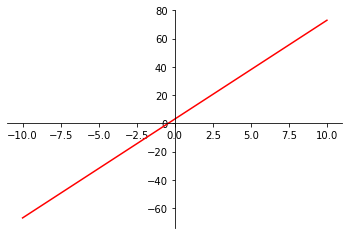

In [3]:
x = np.linspace(-10,10)
y = 7*x + 3
plt.plot(x,y,color='r')
set_spines()

Suppose we observe $n$ data pairs denoted with $(x_i,y_i), i = 1,2,...,n$.

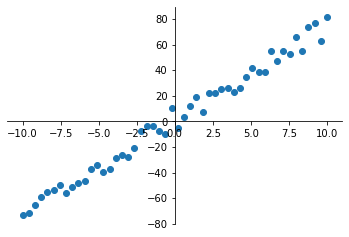

In [4]:
y = 7*x + 3 + np.random.uniform(-10,10,size=x.size)
plt.scatter(x,y)
set_spines()

We can describe the underlying relationship between $y_i$ and $x_i$ invloving the error term $\varepsilon_i$ in linear equation $y_i =  \alpha + \beta x_i + \varepsilon_i $.The  $\varepsilon_i$  could be intepreted as the noise (bias) of the data or in some sense some type of randomness originated from various reasons.Also it is know as 'error term' or 'residual'.
Our target is to find estimated values $\alpha$ and $\beta$ which would provide the best fit in some sense for data points.
In order to find the 'best' fit we will use the <a href='https://en.wikipedia.org/wiki/Ordinary_least_squares'>least-squared</a> approach.From  mathematical view point the issue involved the minimization of Lost function respect to $\alpha,\beta$. 
 $$1)  L = \sum_i(y_i - \alpha - \beta x_i)^2$$.
$L$ is called $Lost$ function the expression $(y_i - \alpha - \beta x_i)^2$ is called $Cost$ function.This function is appropiative because of It is a diferencianal everywhere and gives us  a measure of diference between dependent value $y_i$ and predicted value of $y'(\alpha,\beta)=\alpha + \beta x_i $.<br>
In order to find $min_{\alpha,\beta}L(\alpha,\beta,x_i,_yi)$ we will use <mark>Gradient Descent method</mark>.<br>

 $$L = \sum_i(y_i - w_0- w_1 x_i)^2  $$

Therefore, ridge regression puts further constraints on the parameters, $w_j$'s, in the linear model. In this case, what we are doing is that instead of just minimizing the residual sum of squares we also have a penalty term on the $w$'s. This penalty term is $λ$ (a pre-chosen constant) times the squared norm of the $w$ vector. This means that if the $w_j$'s take on large values, the optimization function is penalized. We would prefer to take smaller $w_j$'s, or $w_j$'s that are close to zero to drive the penalty term small.



<h2 id='grad~sim~linear'>1.2 Gradient Descent over simple linear regression</h2>

The methods for finding the maximum and minimum (extrema) have been created with the development of mathematical analysis(Calculus). Gradient Descent is a numerical approach to the local minimum of a first-order differentiable function. The idea is to take repeated steps in the opposite direction of the gradient the function in the current point. 


Our purpose is to find the value of $x$ where the function gets the minimum value.
The GD algorithm is difined : 
  $$\alpha = \alpha - \nabla_{\alpha}L(\alpha,\beta)*h$$
  $$\beta = \beta - \nabla_{\beta}L(\alpha,\beta)*h$$ <br>
  


where $h$ is called <mark>Learning rate</mark> or step size.
Applying GD algorithm over our Lost function 1) we  get : <br> <br>
$$\nabla_{\alpha}(J(a,b)=\frac{\partial{L}}{\partial{{\alpha}}}=\frac{\partial{\sum_i(y_i - \alpha - \beta x_i)^2}}{\partial{{\alpha}}}=-\frac{2}{n}\sum_{n=1}^{n}{(y_i-a*x_i - b)*x_i} $$ <br>
$$\nabla_{\beta}(J(a,b)=\frac{\partial{L}}{\partial{{\beta }}}=\frac{\partial{\sum_i(y_i - \alpha - \beta x_i)^2}}{\partial{{\beta}}}=- \frac{2}{n}\sum_{n=1}^{n}{(y_i-a*x_i - b)} $$ <br> <br>


applying the above local derivatives to Gradient Descent formula we get
 $$\alpha = \alpha + \frac{2}{n}\sum_{n=1}^{n}{(y_i-a*x_i - b)*x_i}*h$$
  $$\beta = \beta +\frac{2}{n}\sum_{n=1}^{n}{(y_i-a*x_i - b)}*h$$ <br>

The above equations are performed enough times to reach the minimum of Lost function with conditional that we have chosen the appropriate Learning rate $h$.

<h2 id='grad~sim~linear'>1.3 Implementation of Gradient Descent for simple linear regression (Python)</h2>

In [5]:
#implementation cost function
def cost(X,Y,alpha,betta):
    '''
    Calculation of cost (error) function of simple linear regression
   
    Parrameters : 
    X(array or number) : X arguments, independent variable
    Y (array or number) : Y arguments, actual dependent variable 
    Returns :
      number of cost function
  '''
   
    return np.sum((Y - (alpha - betta*X ))**2 )

In [59]:
def gradient_descent(X,Y,C=0.1,E=100):
    '''
    
    Mimumization of cost (error) function of simple linear regression
   
    Parrameters : 
    X(array or number) : X arguments, independent variable
    Y (array or number) : Y arguments, actual dependent variable 
    C (number) :  learning rate
    I(int) : number of iteration(Epoch)
    Returns :
      number of cost function
   '''
   
    a =1 
    b = 1 
    a_args = []
    b_args =   []
    n = X.size
    
    for i in range(E):
        
        a = a + 2/n*(np.sum((Y - a*X - b)*X))*C + 
        b =  b + 2/n*(np.sum((Y - a*X -b)))*C
        #print(a,b)
        a_args.append(a)
        b_args.append(b)
    return a,b,a_args,b_args 

Applying this implemenation over our generated data

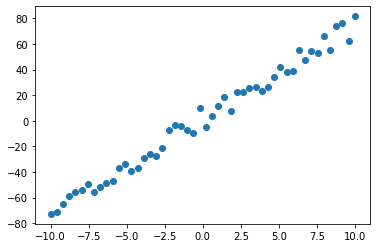

In [7]:
plt.scatter(x,y)

In [8]:
a,b,a_r,b_r = gradient_descent(x,y,C=0.01,E=1000)

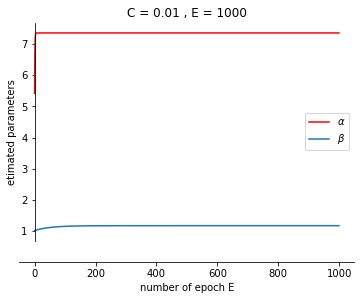

In [9]:
plt.plot(a_r,color='r',label=r'$\alpha $')
plt.plot(b_r,label=r'$\beta$')
plt.xlabel("number of epoch E")
plt.ylabel("etimated parameters")
plt.title('C = 0.01 , E = 1000')
set_spines()
plt.legend()

From graphics we can see that the curves of $\alpha$ tends to $7$ and $\beta$ tends to $3$.
<br> 
The fit line will be : 

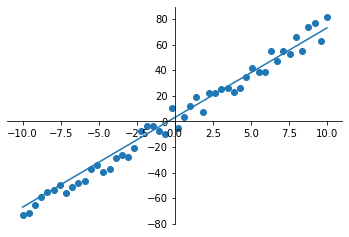

In [10]:
plt.scatter(x,y)  #7 
plt.plot(x, 7*x +  3)
set_spines()

It seems that the equation $y = 7 + 3 x$ describes the data as well as possible.

<h2 id='rates-iterations'>1.3  Different Learning rates and number of Iteration in Gradient Descent</h2>

Again let's generate the data with bigger residuals.

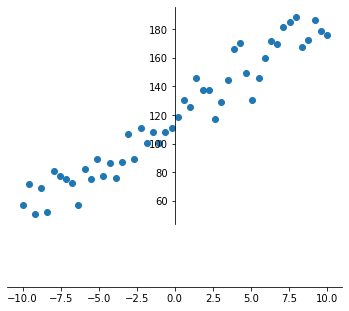

In [29]:
y = 7*x + 120 +np.random.normal(0, 10, size=x.size)  
plt.scatter(x,y)
set_spines()

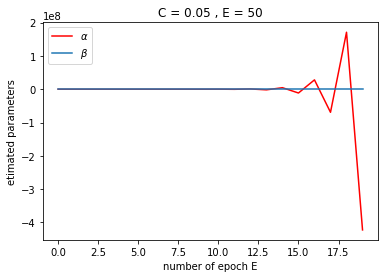

In [12]:
a,b,a_r,b_r = gradient_descent(x,y,C=0.05,E=20)
plt.plot(a_r,color='r',label=r'$\alpha $')
plt.plot(b_r,label=r'$\beta$')
plt.xlabel("number of epoch E")
plt.ylabel("etimated parameters")
plt.title('C = 0.05 , E = 50')
#set_spines()
plt.legend()

When learning rate is 0.05 and Iter.=20 we observe the learning jump.

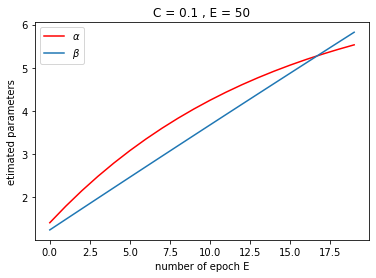

In [13]:
a,b,a_r,b_r = gradient_descent(x,y,C=0.001,E=20)
plt.plot(a_r,color='r',label=r'$\alpha $')
plt.plot(b_r,label=r'$\beta$')
plt.xlabel("number of epoch E")
plt.ylabel("etimated parameters")
plt.title('C = 0.1 , E = 50')
#set_spines()
plt.legend()

When the learning rate is 0.03 and Iter.=20 a is 5.53 but is still increased, which means the number of iterations are small, and $\alpha$ is achieved its minimum, by increasing the iteration $\alpha$ will achieve its limit , as shown below

(6.94185975180276, 121.25601309505842)

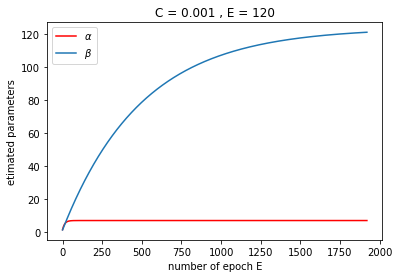

In [14]:
a,b,a_r,b_r = gradient_descent(x,y,C=0.001,E=1920)
plt.plot(a_r,color='r',label=r'$\alpha $')
plt.plot(b_r,label=r'$\beta$')
plt.xlabel("number of epoch E")
plt.ylabel("etimated parameters")
plt.title('C = 0.001 , E = 120')
#set_spines()
plt.legend()
a,b

<h2 id='rates-iterations'>1.3Introduction in Ridge Regression in context of simple Linear Regression </h2>

When the model fit training data too much well,that is the very bad sign.When the model fit training data too much well,that is the very bad sign.In general this mean the biases is fitted by model function.In Machine Learning it called overfit.Let's get below graph.

(31.60565700158197, 374.0877963218534)

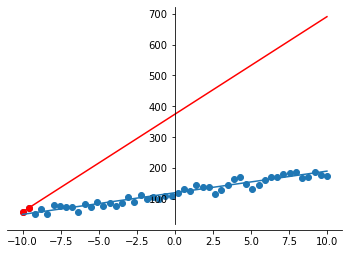

In [31]:
plt.plot(x, 7*x +  120)  
plt.scatter(x, y)
a,b,a_r,b_r = gradient_descent(x[0:2],y[0:2],C=0.005,E=505620)
plt.scatter(x[0:2],y[0:2],color='r')
plt.plot(x, a*x +  b,color='r')
set_spines()
a,b

The red line is a regression line coming from the fitting of only the first two points. <br>
We can see that when we train the model over the first two points, that points have been feet too well,but at all the model is awful because the red line has a  high bias by the rest points.This simple example shows how we can achieved overfit model.The reasons for overfitting could have many different origins and they could be different by itself.In the above example because we train the model over too few points, the model trains the bias of data, which leads to very bad prediction for the rest points.To resolve this problem we have to involve an artificially Bias in our Loss function LSR. 

 $$L = \sum_i(y_i - w_0- w_1 x_i)^2 + \lambda(w_0^2 + w_1^2) $$

Therefore, ridge regression puts further constraints on the parameters, $w_j$'s, in the linear model. In this case, what we are doing is that instead of just minimizing the residual sum of squares we also have a penalty term on the $w$'s. This penalty term is $λ$ (a pre-chosen constant) times the squared norm of the $w$ vector. This means that if the $w_j$'s take on large values, the optimization function is penalized. We would prefer to take smaller $w_j$'s, or $w_j$'s that are close to zero to drive the penalty term small.


Appling Gradient Descent over penalty Loss function we obtain  :


$\nabla_{w_1}(J(w_1,w_0)=\frac{\partial{L}}{\partial{{\alpha}}}=\frac{\partial{\sum_i(y_i - w_0 - w_1 x_i)^2}}{\partial{{w_1}}} + \frac{\partial{\lambda(w_0^2 + w_1^2)  }}{w_1}  =-\frac{2}{n}\sum_{n=1}^{n}{(y_i-w_1*x_i - w_0)*x_i} + 2\lambda w_1 $ <br>
$\nabla_{w_0}(J(w_1,w_0)=\frac{\partial{L}}{\partial{{\beta }}}=\frac{\partial{\sum_i(y_i - w_0 - w_1 x_i)^2}}{\partial{{w_0}}} + \frac{\partial{ \lambda(w_0^2 + w_1^2) }}{w_1}  =- \frac{2}{n}\sum_{n=1}^{n}{(y_i-a*x_i - b)} + 2\lambda w_0 $ <br> <br>

the new gradient descent implementation :

In [63]:
def gradient_descent(X,Y,L = 0 , C=0.1,E=100):
    '''
    
    Mimumization of cost (error) function of simple linear regression
   
    Parrameters : 
    L penalty coeficient (L1 regularization)
    X(array or number) : X arguments, independent variable
    Y (array or number) : Y arguments, actual dependent variable 
    C (number) :  learning rate
    I(int) : number of iteration(Epoch)
    Returns :
      number of cost function
   '''
   
    a =1 
    b = 1 
    a_args = []
    b_args =   []
    n = X.size
    
    for i in range(E):
        a = a + (2/n)*(np.sum((Y - a*X - b)*X))*C + L*a
        b =  b + (2/n)*(np.sum((Y - a*X -b)))*C + L*b
        #print(a,b)
        a_args.append(a)
        b_args.append(b)
    return a,b,a_args,b_args 

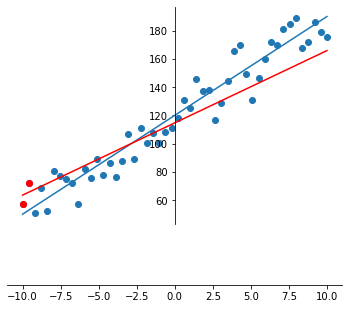

In [91]:
plt.plot(x, 7*x +  120)  #L = 0.0028
plt.scatter(x, y)
a,b,a_r,b_r = gradient_descent(x[0:2],y[0:2],L=0.00258 ,C=0.005,E=1800)
plt.scatter(x[0:2],y[0:2],color='r')
plt.plot(x, a*x +  b,color='r')
set_spines()
#a,b


<h1 id='m-linear-r'> Multiple Linear Regression from scratch</h1>

Multiple Linear Regression also known as multiple regression, is a statistical technique that uses several explanatory variable to predict the outcome of response variable.In essence, MLR is an extension of ordinary least-squared regression.The equation that we are searching for is defined by : <br> <br>

$$\hat{ y}^i= h(x{^i}) =  \omega_0 + \omega_1 x^i_{1} + \omega_2 x_{2}^i+ ...\omega_p x_{p}^i +ε^i  $$

where , $i$ is number of obeservation,
$y_i$ dependet(target) value,
$x_p $ feature values,
$\omega_0$ intercept,
$\omega_{p}$ slope coeff.(weight) for each explanority variable $\epsilon_i$  is referred to as the error.


The above hypotesis can also be represented by  
 $$\hat{Y} = X\Omega + \epsilon$$  

Consider an experiment in which p characteristics of n samples are measured. The data from this experiment are
denoted $X$.
 where  $$X = \begin{bmatrix} 
1 &x_1^1 & x_1^2 & x_1^p \\
\vdots & \ddots & \vdots & \vdots \\
1& x_n^1 & \dots & x_n^p \\
\end{bmatrix} $$

$\Omega = \begin{bmatrix} 
\omega_1 \\
\vdots & \\
\omega_p \\
\end{bmatrix} $ 
is the regression parameter or weights,or predictors. The parameter $\omega_j$ , $j = 1, . . . , p,$ represents
the effect size of covariate j on the response. That is, for each unit change in covariate j (while keeping the
other covariates fixed) the observed change in the response is equal to $\omega_j$ .

$\epsilon = \begin{bmatrix} 
\epsilon_1 \\
\vdots & \\
\epsilon_p \\
\end{bmatrix} $ are the bias normaly distributed as $\epsilon_ ∼ N (\omega_p, σ2)$

To define and measure the error of our model we define the Lost function as the sum of the squares of the residuals as in simple linear regression. The Lost is the same :
    $$ \hspace{1cm} J(\varTheta) = \frac{1}{2m}\sum_{i=0}^m(h(x^i) - y^i)^2 $$

We have to initialize the model parameter with some random values(random initialization).To use Gradient Descent we need to measure how the lost function changes with change in it's parametes.Therefore we compute the partial derivatives of lost finction $\hspace{1cm}  J(\omega_0,\omega_1,...,\omega_n)$ <br> <br>
$$ \frac{\partial{J(\Omega)}}{\partial{\omega_j}} = \frac{1}{m}\sum_{i=0}^m(h(x^i) - y^i)x_j^i$$
In more compatable form using matrix in order to be implemnted using <mark>NUMPY</mark>


Using the <a href='https://en.wikipedia.org/wiki/Einstein_notation' > Eistein notaion </a> we can rewrite eq. 4) <br> <br> <br>
$$ \frac{\partial{J(\omega_k)}}{\partial{\omega_j}} = \frac{1}{m}(\omega_p x_p^i - y^i)x_j^i $$ in matrix form <br> <br> <br>
 $$5) \hspace{1cm}  \vec{\nabla} J(\Omega)=((X\Omega^T- Y)^T.X)^T $$ <br> <br>
  applying the rule  $(AB)^T$ the eq can be reformed
   $$6) \hspace{1cm}  \vec{\nabla} J(\Omega)= X^T(X\Omega^T- Y) $$  <br> <br>
 $$ where  \hspace{1cm} \vec{\nabla} = \frac{\partial}{\partial{\omega_j}\vec{e_j}}$$ <br> <br>

 eq. 6 is extremely comfortable because it can be implemented very simple in <mark>NUMPY</mark> which is many times faster than common Python


The Gradient Descent alg finaly will looks like that : <br>
 $$\theta = \theta - h\vec{\nabla} J(\Omega) $$ h is learnig rate
$h$

Calcaulation of accuracy of Multilinear regression by $R^2$

We will be using Root mean squared error(RMSE) of Determination($R^2$ score)  to evaluate our model.<br>
RMSE is a square root of average of sum of suares of residualas.
RMSE is difined by : <br>
$$ RMSE =\sqrt{\frac{1}{2}\sum_{i=1}^m(h(x^i)- y ^i)} $$
R² score or the coefficient of determination explains how much the total variance of the dependent variable can be reduced by using the least square regression.<br>
$R^2$ is determed by 
    $$R^2 = 1 - \frac{SS_r}{SS_t}$$

$SS_t$  is the total sum of errors if we take the mean of the observed values as the predicted value.
$$SS_t =\sum_{i=1}^m( y ^i -\bar{y})^2 $$ <Br>
    $$ SS_r =\sum_{i=1}^m(h(x^i)- y ^i)^2 $$

<h2>Implementation of Multiple Linear regression in NUMPY</h2>

In [92]:
class MultipleLinearRegression:
    """
    Multiple Linear regression

    Parameters
    ..........

    C : float
        learning rate
    I : int
        number of iterations (Epochs)
    Attributes
    ..........
     w_ : weights (Predictors)

    """

    def __init__(self, C=0.001, I=50):
        self.C = C
        self.I = I
        self.w_ = None

    def fit(self, X, Y):
        """Fit tthe training data

        Parameters
        ..........

        X : array, shape = [N_samples,n_features]
            Training samples
        Y  : array, shape = [n_samples, n_target_values]

        Returns
        .......
        self : object

        """

        X, Y = self._validate(X, Y)
        self.w_ = np.ones((X.shape[1], 1))  # inicialized predictors
        M = X.shape[0]  # numbers of samples
        for _ in range(self.I):
            self.w_ =self.w_ -  self.C * (1 / M) * X.T.dot((X.dot(self.w_) - Y))

        return self

    def predict(self, x):
        """ Predicts the value after the model has been trained.
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Test samples
        Returns
        -------
        Predicted value
        """
        x = np.append(np.ones((x.shape[0], 1)), x, axis=1)
        return np.dot(x, self.w_)

    def score(self,X, Y):
        """Calculation of accuracy using (R^2 score)
             x : array-like, shape = [n_samples, n_features]
             y : array-like, shape = [n_samples, n_features]
            Test samples
        Returns
        float : score
        -------
        Predicted value

        """
        #X = np.append(np.ones((X.shape[0], 1)), X, axis=1)
        #Y = np.array(Y).reshape(X.shape[0], 1)
        X,Y = self._validate(X,Y)
        y_prime = np.dot(X, self.w_)
        ssr = np.sum((y_prime - Y) ** 2)
        sst = np.sum((Y - np.mean(y_prime)) ** 2)
        r2_score = 1 - (ssr / sst)
        return r2_score
    
    def _validate(self,X,y):
        '''Added tow with one number to X data
        reshape Y data


        :param X: array-like, shape = [n_samples, n_features]
        :param y: array-like, shape = [n_samples, n_target_values]
        :return: validated X,Y
        '''
        return   np.append(np.ones((X.shape[0], 1)), X, axis=1),\
                 np.array(y).reshape(y.shape[0], 1)

<h2>Perform out implementation in insurence.csv data set</h2>

We will test our implementation over insurence.csv data set

In [93]:
df = pd.read_csv("../../../resources/data/insurance.csv")  
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Converting Categories to Numbers. The linear regression can be performed only on numbers, so we should convert these categorical features into numbers. To do that, we can make use of a function called get_dummies. So let’s convert the “sex,” “smoker,” and “region” columns into numerically represented features.

In [95]:
cols = ['sex', 'smoker', 'region']
new_df = pd.get_dummies(df, cols, drop_first= True)
new_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


Now, let’s only select the features that are the most relevant. Feature selection is one of the important tasks in any machine learning project. You must know which features are most correlated with the targets (the “charges” column in our case) and must only use those features that have a high correlation with your target. This can be done through experimentation. For example, in this problem, I tried using the “sex” and “region” features to predict “charges” but didn’t find much of an improvement in the prediction performance of the model. So I decided to omit these features from the model. Through small experimentation like that, I found the “age,” “bmi,” and “smoker” columns to be most relevant when predicting insurance costs (the “charges” column in our data frame).

In [96]:
X = new_df[['age', 'bmi', 'smoker_yes']]
y = new_df['charges']

We will perfomr standarlization over X 

In [100]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Splliting data to Train and Test

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

End let to train the data using our implementation

In [105]:
model =  MultipleLinearRegression(C=0.01,I=1000)
z = model.fit(X_train,y_train)

In [106]:
model.score(X_test,y_test)

0.7128310166283514

We've achived according to 𝑅2  score 71% accuracy

Let see how will be in standart LinearRegresion in sklearn in Python

In [107]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.712788542109471

The score using imprlemntation in sklearn in Python is the same as our implementation , Let to compare  the  predicted valuea

In [108]:
our_predicted_data = model.predict(X_test)[:,0]
python_predicted_data = lr.predict(X_test)
pd.DataFrame(our_predicted_data ,python_predicted_data  )

,0
29119.946875,29119.035701
39829.264757,39827.692138
11183.977157,11183.502696
35541.425883,35539.984250
33716.299891,33715.072491
...,...
28760.667481,28759.126902
15247.037940,15246.651528
2080.529486,2080.402693
11609.605324,11609.561140


The diferences is too small,but we can perform $R^2 score$ over the both Python and Our predicted  data  

In [109]:
ssr = np.sum((our_predicted_data - python_predicted_data) ** 2)
sst = np.sum((our_predicted_data - np.mean(python_predicted_data)) ** 2)
r2_score = 1 - (ssr / sst)
r2_score

0.9999999952854686

0.9999999976969305 shows that the difference is negligible

<h2> References </h2>
<ul>
    <li> </li>
<li><a href='https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/'>A comprehensive beginners guide for Linear, Ridge and Lasso Regression in Python and R </a></li>
<li> <a href='https://www.youtube.com/watch?v=Q81RR3yKn30&ab_channel=StatQuestwithJoshStarmer'> Regularization Part 1: Ridge (L2) Regression </a> </li>
    <li><a href='https://arxiv.org/pdf/1509.09169;Lecture'>Lecture notes on ridge regression</a> </li>
    <li> <a href='https://medium.com/@minions.k/ridge-regression-l1-regularization-method-31b6bc03cbf'>Ridge</a> </li>
    </ul>